In [4]:
import pymol as pm
import pandas as pd

In [5]:
import tmtools
from tmtools.io import get_structure, get_residue_data
from tmtools.testing import get_pdb_path
from tmtools import tm_align

In [6]:
casf_pdbs = []
with open('casf_2016_ids.txt') as f:
    for line in f:
        casf_pdbs.append(line[:4])
print(len(casf_pdbs))
print(casf_pdbs[:10])

285
['1a30', '1bcu', '1bzc', '1c5z', '1e66', '1eby', '1g2k', '1gpk', '1gpn', '1h22']


In [7]:
casf_clusters = dict(pd.read_csv('casf_2016_clusters.csv', index_col='PDB code').T)

In [8]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

In [9]:
cluster_dict = {}

for p in casf_pdbs:  
    append_value(cluster_dict, casf_clusters[p.upper()]['Cluster ID'], p)

In [10]:
cluster_dict

{39: ['1a30', '1eby', '1g2k', '2qnq', '3o9i'],
 49: ['1bcu', '1oyt', '2zda', '3bv9', '3utu'],
 56: ['1bzc', '2hb1', '2qbp', '2qbq', '2qbr'],
 57: ['1c5z', '1o5b', '1owh', '1sqa', '3kgp'],
 4: ['1e66', '1gpk', '1gpn', '1h22', '1h23'],
 15: ['1k1i', '1o3f', '1uto', '3gy4', '4abg'],
 24: ['1lpg', '1mq6', '1z6e', '2xbv', '2y5h'],
 2: ['1nc1', '1nc3', '1y6r', '4f2w', '4f3c'],
 44: ['1nvq', '2br1', '2brb', '3jvr', '3jvs'],
 41: ['1o0h', '1u1b', '1w4o', '3d6q', '3dxg'],
 29: ['1p1n', '1p1q', '1syi', '2al5', '4u4s'],
 6: ['1ps3', '3d4z', '3dx1', '3dx2', '3ejr'],
 21: ['1pxn', '2fvd', '2xnb', '3pxf', '4eor'],
 18: ['1q8t', '1q8u', '1ydr', '1ydt', '3ag9'],
 48: ['1qf1', '1z9g', '3fcq', '4tmn', '5tmn'],
 28: ['1qkt', '2p15', '2pog', '2qe4', '4mgd'],
 40: ['1r5y', '1s38', '3gc5', '3ge7', '3rr4'],
 30: ['1vso', '3fv1', '3fv2', '3gbb', '4dld'],
 32: ['1yc1', '2xdl', '2yki', '3b27', '3rlr'],
 7: ['1z95', '3b5r', '3b65', '3b68', '3g0w'],
 45: ['2c3i', '3bgz', '3jya', '4k18', '5dwr'],
 10: ['2cbv', '2c

In [46]:
for i in cluster_dict.keys():
    for p in cluster_dict[i]:
        s = get_structure(f'../pdbbind_2020_general/{p}/{p}_pocket.pdb')
        s_chain = next(s.get_chains())
        print(s_chain)
        s_coords, s_seq = get_residue_data(s_chain)
        for q in cluster_dict[i]:
            t = get_structure(f'../pdbbind_2020_general/{q}/{q}_pocket.pdb')
            t_chain = next(t.get_chains())
            t_coords, t_seq = get_residue_data(t_chain)
            res = tm_align(s_coords, t_coords, s_seq, t_seq)
            print(res.tm_norm_chain1)
            print(res.tm_norm_chain2)
            
        
    

<Chain id=A>
1.0
1.0
0.9775122207202124
0.8176252843047139
0.9340096425668227
0.7950932323926551
0.9031924702065174
0.7961262962292008
0.8294117927529746
0.7717906784999332
<Chain id=A>
0.8176252843047138
0.9775122207202124
1.0
1.0
0.9580929489518238
0.9580929489518238
0.9036519080489162
0.9260326346032756
0.829573718200138
0.893632207798611
<Chain id=A>
0.7950932323926552
0.934009642566823
0.9580929489518243
0.9580929489518243
1.0
1.0
0.9287764619003737
0.9532411000478835
0.7799296911231237
0.8296898817091546
<Chain id=A>
0.7961262962292007
0.9031924702065172
0.9260326346032757
0.9036519080489167
0.9532411000478838
0.9287764619003738
1.0
1.0
0.7859600544335412
0.8181674258456385
<Chain id=A>
0.7717906784999331
0.8294117927529745
0.893632207798612
0.8295737182001388
0.8296898817091548
0.7799296911231239
0.8181674258456384
0.7859600544335411
1.0
1.0
<Chain id=H>
1.0
1.0
0.965121979108112
0.6576236575994168
0.9566880953905355
0.6657517800742765
0.9301482348364389
0.652602621659709
0.9287

0.9604510399076684
0.6242560852281234
0.962338175143819
0.9345688519254663
1.0
1.0
0.9644014637679605
0.9940559389655446
<Chain id=A>
0.616364639931666
0.5084523579578131
0.962882060380642
0.6066949475223677
0.9596701740190535
0.9045081300335658
0.9940559389655446
0.9644014637679605
1.0
1.0
<Chain id=A>
1.0
1.0
0.8205638913428612
0.8067869628813691
0.8778976011151088
0.7671108688364623
0.8770364724326163
0.8322953187444857
0.1868113421773687
0.39301331929513555
<Chain id=C>
0.8067869628813688
0.8205638913428611
1.0
1.0
0.9503660488810997
0.8428310173080533
0.9079730033111693
0.8763496432041414
0.1436715609106283
0.1821562692681505
<Chain id=A>
0.7671108688364623
0.8778976011151091
0.8428310173080533
0.9503660488810997
1.0
1.0
0.8876555126778005
0.9699586900924914
0.13093899529502914
0.1767347601943466
<Chain id=A>
0.8322953187444851
0.8770364724326158
0.8763496432041411
0.907973003311169
0.9699586900924915
0.8876555126778006
1.0
1.0
0.17754478685773448
0.42533569811452415
<Chain id=A>


<Chain id=A>
0.9722412406544138
0.9457165544352107
0.9843691569601997
0.9439868933930251
1.0
1.0
0.9494177277703139
0.8986087374079306
0.8333529497233282
0.9237217358759753
<Chain id=A>
0.9316288885848828
0.9569916632165688
0.9140780509614173
0.9264536475178075
0.8986087374079306
0.9494177277703139
1.0
1.0
0.7641958013284456
0.8949849625908621
<Chain id=A>
0.9131771195545048
0.8006678183794044
0.925044663857948
0.8007133063691525
0.9237217358759756
0.8333529497233281
0.8949849625908621
0.7641958013284456
1.0
1.0
<Chain id=B>
1.0
1.0
0.9654815335138862
0.9466287597006148
0.8534253835622413
0.9450100220408877
0.9491579705838508
0.8366681605479347
0.9456340518446026
0.8930969649060686
<Chain id=A>
0.9466287597006143
0.9654815335138862
1.0
1.0
0.8381681341296999
0.9416376312339051
0.9206332452520131
0.829347269787171
0.9300882655359405
0.8952179135261177
<Chain id=A>
0.9450100220408871
0.8534253835622407
0.9416376312339051
0.8381681341296996
1.0
1.0
0.9629441301036192
0.7653436248834484
0.

0.9932593672314346
0.9514805616530968
0.8879716809235165
0.9480193477443954
0.9960705882777389
0.8970527812238817
0.13112474714521383
0.1389217094603854
<Chain id=A>
0.9514805616530967
0.9932593672314345
1.0
1.0
0.8596568982722996
0.9587275708387617
0.9966932350367532
0.9372085006005519
0.16576553074450562
0.12527535618530194
<Chain id=A>
0.9480193477443952
0.8879716809235164
0.9587275708387618
0.8596568982722994
1.0
1.0
0.9578208816748115
0.8087329383243745
0.17177586893269103
0.11094337663647182
<Chain id=B>
0.8970527812238815
0.9960705882777386
0.9372085006005519
0.9966932350367532
0.808732938324374
0.9578208816748115
1.0
1.0
0.12158798794913026
0.13849176714805725
<Chain id=A>
0.13892170946038532
0.13112474714521383
0.12527535618530186
0.16576553074450556
0.11094337663647189
0.17177586893269098
0.13849176714805722
0.12158798794913021
1.0
1.0
<Chain id=A>
1.0
1.0
0.46553221457575333
0.4433640138816698
0.7502753000441034
0.5591943633253735
0.7591883442101832
0.6622329757668279
0.1164

1.0
1.0
0.9499997541609564
0.9652653641733203
0.8474028353583264
0.9030118852196106
0.5730420211936831
0.8788787422002935
0.6066553232779655
0.9342479182009965
<Chain id=A>
0.9652653641733203
0.9499997541609565
1.0
1.0
0.8416050651769871
0.8833701790119889
0.6027172250278464
0.9178000759469264
0.6208776657305146
0.9487331350557001
<Chain id=B>
0.9030118852196102
0.8474028353583263
0.8833701790119891
0.8416050651769873
1.0
1.0
0.5939520195279363
0.8560632051328719
0.6152453773008588
0.8854917056908509
<Chain id=A>
0.8788787422002938
0.5730420211936831
0.9178000759469261
0.6027172250278464
0.8560632051328719
0.5939520195279363
1.0
1.0
0.8908439165783367
0.8908439165783367
<Chain id=A>
0.9342479182009965
0.6066553232779653
0.9487331350557001
0.6208776657305146
0.885491705690851
0.6152453773008589
0.8908439165783364
0.8908439165783364
1.0
1.0
<Chain id=A>
1.0
1.0


KeyError: 'LLP'

# Try and do sequence independent structure similarity

In [39]:
from prody import *


In [40]:
def union_of_active_site_residues(list_):  
    result = {}
    for p in list_:
        pocket_pdb = parsePDB(f'../pdbbind_2020_general/{p}/{p}_pocket.pdb')
        pocket_protein = pocket_pdb.select('protein')
        pocket_dict = ({num :res for num, res in zip(pocket_protein.getResnums(),pocket_protein.getResnames())})
        result.update(pocket_dict)
    return result
        

In [41]:
print(union_of_active_site_residues(['4e6q', '4f09', '4gfm', '4hge', '4jia']))

@> 552 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 460 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 497 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 532 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 484 atoms and 1 coordinate set(s) were parsed in 0.01s.


{853: 'GLN', 854: 'GLN', 855: 'LEU', 856: 'GLY', 857: 'LYS', 858: 'GLY', 859: 'ASN', 860: 'PHE', 861: 'GLY', 862: 'SER', 863: 'VAL', 864: 'GLU', 865: 'MET', 878: 'VAL', 879: 'VAL', 880: 'ALA', 881: 'VAL', 882: 'LYS', 883: 'LYS', 884: 'LEU', 885: 'GLN', 895: 'PHE', 898: 'GLU', 902: 'LEU', 911: 'VAL', 912: 'LYS', 914: 'LYS', 927: 'LEU', 928: 'ILE', 929: 'MET', 930: 'GLU', 931: 'TYR', 932: 'LEU', 933: 'PRO', 934: 'TYR', 935: 'GLY', 936: 'SER', 937: 'LEU', 938: 'ARG', 939: 'ASP', 976: 'ASP', 978: 'ALA', 979: 'THR', 980: 'ARG', 981: 'ASN', 982: 'ILE', 983: 'LEU', 984: 'VAL', 985: 'GLU', 991: 'LYS', 992: 'ILE', 993: 'GLY', 994: 'ASP', 995: 'PHE', 996: 'GLY', 997: 'LEU', 940: 'TYR', 866: 'CYS', 913: 'TYR', 974: 'HIS', 943: 'LYS', 944: 'HIS'}


In [42]:
def create_new_pocket(cluster_list):
    union_residues = union_of_active_site_residues(cluster_list)
    residue_nums = list(union_residues.keys())
    first_part_selection_algebra = ' (resi ' + str(residue_nums[0])
    middle_part_selection_algebra = ''.join([' , resi ' + str(i) for i in residue_nums[1:]])
    for c in cluster_list:
        pymol_selection_algebra = first_part_selection_algebra + middle_part_selection_algebra + ')'
        pm.cmd.load(f'../pdbbind_2020_general/{c}/{c}_protein.pdb', c)
        pm.cmd.select(f'{c}_pocket', pymol_selection_algebra)
        pm.cmd.save(f'../pdbbind_2020_general/{c}/{c}_pocket_consistent.pdb', f'{c}_pocket')
        pm.cmd.delete('all')

In [43]:
for i in cluster_dict.values():
    create_new_pocket(i)

@> 481 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 624 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 604 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 608 atoms and 1 coordinate set(s) were parsed in 0.01s.


 PyMOL not running, entering library mode (experimental)


@> 374 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 587 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 573 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 593 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 604 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 462 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 408 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 557 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 515 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 481 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 354 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 397 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 481 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 519 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 391 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 627 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 513 atoms and 1 coordinate set(s) were parsed in 0.00

@> 491 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 462 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 481 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 425 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 525 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 231 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 502 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 494 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 582 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 502 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 425 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 563 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 532 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 455 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 472 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 453 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 460 atoms and 1 coordinate set(s) were parsed in 0.00

@> 532 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 484 atoms and 1 coordinate set(s) were parsed in 0.00s.


In [51]:
most_similiar_structure_values = {}
most_similiar_structure_pdbs = {}
least_similiar_structure_values = {}
least_similiar_structure_pdbs = {}
all_tmscore_values = []

for i in cluster_dict.keys():
    for p in cluster_dict[i]:
        s = get_structure(f'../pdbbind_2020_general/{p}/{p}_pocket_consistent.pdb')
        s_chain = next(s.get_chains())
        s_coords, s_seq = get_residue_data(s)
        most_similiar_structure_values[p] = 0
        least_similiar_structure_values[p] = 1
        for q in cluster_dict[i]:
            if q != p:
                t = get_structure(f'../pdbbind_2020_general/{q}/{q}_pocket_consistent.pdb')
                t_chain = next(t.get_chains())
                t_coords, t_seq = get_residue_data(t)
                res = tm_align(s_coords, t_coords, s_seq, t_seq)
                all_tmscore_values.append(res.tm_norm_chain1)
                if res.tm_norm_chain1 != res.tm_norm_chain2:
                    pass
                if res.tm_norm_chain1 > most_similiar_structure_values[p]:
                    most_similiar_structure_values[p] = res.tm_norm_chain1
                    most_similiar_structure_pdbs[p] = q
                if res.tm_norm_chain1 <= least_similiar_structure_values[p]:
                    least_similiar_structure_values[p] = res.tm_norm_chain1
                    least_similiar_structure_pdbs[p] = q
                    
            

In [52]:
print(len(most_similiar_structure_pdbs))
print(len(least_similiar_structure_pdbs))
print(len(most_similiar_structure_values))
print(len(least_similiar_structure_values))

285
285
285
285


In [33]:
import pickle

pickle.dump(most_similiar_structure_pdbs, open('casf_most_similiar_crossdock_dict', 'wb'))
pickle.dump(least_similiar_structure_pdbs, open('casf_least_similiar_crossdock_dict', 'wb'))

In [34]:
most_similiar_structure_pdbs['1o0h']

'3dxg'

In [35]:
least_similiar_structure_pdbs['1o0h']

'1u1b'

# Ligand-based clustering

In [22]:
from rdkit.Chem.rdmolfiles import SDMolSupplier
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import RDKFingerprint
import rdkit

In [53]:
most_similiar_ligand_values = {}
most_similiar_ligand_pdbs = {}
least_similiar_ligand_values = {}
least_similiar_ligand_pdbs = {}
all_ligand_values = []

for i in cluster_dict.keys():
    for p in cluster_dict[i]:
        s = next(SDMolSupplier(f'../pdbbind_2020_general/{p}/{p}_ligand_pymol.sdf'))
        if s == None:
            s = rdkit.Chem.MolFromMol2File(f'../pdbbind_2020_general/{p}/{p}_ligand.mol2')
        s_fing = RDKFingerprint(s)
        most_similiar_ligand_values[p] = 0
        least_similiar_ligand_values[p] = 1
        for q in cluster_dict[i]:
            if q != p:
                t = next(SDMolSupplier(f'../pdbbind_2020_general/{q}/{q}_ligand_pymol.sdf'))
                if t == None:
                    t = rdkit.Chem.MolFromMol2File(f'../pdbbind_2020_general/{q}/{q}_ligand.mol2')
                rdkit.Chem.rdmolops.SanitizeMol(t)
                t_fing = RDKFingerprint(t)
                tanimoto = FingerprintSimilarity(s_fing, t_fing)
                all_ligand_values.append(tanimoto)
                if tanimoto > most_similiar_ligand_values[p]:
                    most_similiar_ligand_values[p] = tanimoto
                    most_similiar_ligand_pdbs[p] = q
                if tanimoto <= least_similiar_ligand_values[p]:
                    least_similiar_ligand_values[p] = tanimoto
                    least_similiar_ligand_pdbs[p] = q
                    
    

RDKit ERROR: [10:07:15] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24
[10:07:15] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

RDKit ERROR: 
RDKit ERROR: [11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:42:07] ERROR: Could not sanitize molecule ending on line 90
RDKit ERROR: [11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:42:07] ERROR: Could not sanitize molecule ending on line 90
[11:42:07] ERROR: Could not sanitize molecule ending on line 90
[11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[11:42:07] ERROR: Could not sanitize molecule ending on line 90
RD

ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 11 12 15

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] ERROR: Could not sanitize molecule ending on line 77
[11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] ERROR: Could not sanitize molecule ending on line 77
[11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] ERROR: Could not sanitize molecule ending on line 77
[11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] ERROR: Could not sanitize molecule ending on line 77
[11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 8 10 11 12 13

[11:42:07] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 

RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[11:42:08] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16

RDKit ERROR: 
RDKit ERROR: [11:42:08] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [11:42:08] ERROR: Could not sanitize molecule ending on line 266
[11:42:08] ERROR: Could not sanitize molecule ending on line 266
RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [11:42:08] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [11:42:08] ERROR: Could not sanitize molecule ending on line 266
[11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16

[11:42:08] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16

[11:42:08] ERROR: Could not sanitize molecule ending on line 266
RDKit ERROR: [11:42:08] ERROR: C

RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 9 11 16 19
[11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 9 11 16 19

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19

RDKit ERROR: 
RDKit ERROR: [11:42:09] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:42:09] ERROR: Could not sanitize molecule ending on line 152
[11:42:09] ERROR: Could not sanitize molecule ending on line 152
RDKit ERROR: [11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:42:09] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:42:09] ERROR: Could not sanitize molecule ending on line 152
RDKit ERROR: [11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:42:09] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
RDKit

[11:42:09] ERROR: Could not sanitize molecule ending on line 100
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 18 19 20

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[11:42:09] ERROR: Could not sanitize molecule ending on line 96
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 7 8 9 24 25 27 28 29 30

[11:42:09] ERROR: Could not sanitize molecule ending on line 118
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 24 25 27 28 29 30

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[11:42:09] ERROR: Could not sanitize molecule ending on line 96
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 18 19 20

[11:42:09] ERROR: Could not sanitize molecule ending on line 100
[11:42:09] 

RDKit ERROR: [11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24
RDKit ERROR: 
RDKit ERROR: [11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24
RDKit ERROR: 
RDKit ERROR: [11:42:09] ERROR: Could not sanitize molecule ending on line 84
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] ERROR: Could not sanitize molecule ending on line 84
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] ERROR: Could not sanitize molecule ending on line 84
[11:42:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] Can't kekulize mol.  Unkekulized atoms: 0 2 3 11 12 13 14 23 24

[11:42:09] ERROR: Could not sanitize molecule ending on line 84
[11:42:09] ERROR: Can't kekulize mol.  Unke

In [33]:
print(least_similiar_ligand_values)
print(most_similiar_ligand_values)

{'1a30': 0.21403508771929824, '1eby': 0.236457437661221, '1g2k': 0.22948073701842547, '2qnq': 0.21403508771929824, '3o9i': 0.22950819672131148, '1bcu': 0.1044932079414838, '1oyt': 0.1282051282051282, '2zda': 0.10671462829736211, '3bv9': 0.1044932079414838, '3utu': 0.12339331619537275, '1bzc': 0.18604651162790697, '2hb1': 0.18604651162790697, '2qbp': 0.29276315789473684, '2qbq': 0.2722841225626741, '2qbr': 0.2794012829650748, '1c5z': 0.12903225806451613, '1o5b': 0.09935897435897435, '1owh': 0.2164009111617312, '1sqa': 0.14992927864214992, '3kgp': 0.09935897435897435, '1e66': 0.41074130105900153, '1gpk': 0.5071482317531979, '1gpn': 0.5825545171339563, '1h22': 0.41074130105900153, '1h23': 0.41074130105900153, '1k1i': 0.0849539406345957, '1o3f': 0.07339449541284404, '1uto': 0.07339449541284404, '3gy4': 0.12139303482587065, '4abg': 0.1588447653429603, '1lpg': 0.35298057602143335, '1mq6': 0.41579272054287475, '1z6e': 0.4336283185840708, '2xbv': 0.35298057602143335, '2y5h': 0.4248484848484848

In [32]:
import pickle

pickle.dump(most_similiar_ligand_pdbs, open('casf_most_similiar_ligand_crossdock_dict', 'wb'))
pickle.dump(least_similiar_ligand_pdbs, open('casf_least_similiar_ligand_crossdock_dict', 'wb'))

# How frequent is the ligand compared to structure the same?

In [46]:
def compare_similarity_dicts(dict1, dict2):
    ans = 0
    for i in dict1.keys():
        if dict1[i] == dict2[i]:
            ans += 1
    return ans
            

In [47]:
compare_similarity_dicts(most_similiar_ligand_pdbs, most_similiar_structure_pdbs)

109

In [48]:
compare_similarity_dicts(least_similiar_ligand_pdbs, least_similiar_structure_pdbs)

69

In [49]:
compare_similarity_dicts(most_similiar_ligand_pdbs, least_similiar_ligand_pdbs)

0

In [50]:
compare_similarity_dicts(most_similiar_structure_pdbs, least_similiar_structure_pdbs)

0

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

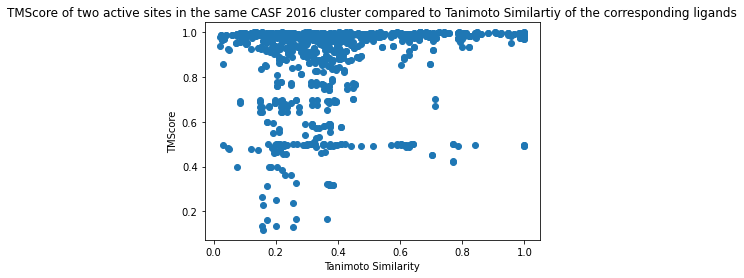

In [65]:
plt.scatter(all_ligand_values, all_tmscore_values)
plt.title('TMScore of two active sites in the same CASF 2016 cluster compared to Tanimoto Similartiy of the corresponding ligands')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('TMScore')
plt.show()

In [61]:
print(pearsonr(all_ligand_values, all_tmscore_values))

(0.0959652194110496, 0.0011782493036097982)
